In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
train = pd.read_csv('/content/gdrive/MyDrive/Datasets/Book1.csv', low_memory=False)
test = pd.read_csv('/content/gdrive/MyDrive/Datasets/testdata.csv', low_memory=False)
print('training data shape', train.shape)
print('testing data shape', test.shape)

training data shape (79999, 342)
testing data shape (20001, 341)


In [27]:
train.head()

,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,GENDER,AGE,HR_MIN_DAY1,HR_MAX_DAY1,HR_MEAN_DAY1,SYS_BP_MIN_DAY1,SYS_BP_MAX_DAY1,SYS_BP_MEAN_DAY1,DIAS_BP_MIN_DAY1,DIAS_BP_MAX_DAY1,DIAS_BP_MEAN_DAY1,MEAN_BP_MIN_DAY1,MEAN_BP_MAX_DAY1,MEAN_BP_MEAN_DAY1,RESP_RATE_MIN_DAY1,RESP_RATE_MAX_DAY1,RESP_RATE_MEAN_DAY1,TEMP_MIN_DAY1,TEMP_MAX_DAY1,TEMP_MEAN_DAY1,SPO2_MIN_DAY1,SPO2_MAX_DAY1,SPO2_MEAN_DAY1,GLUCOSE_MIN_DAY1,GLUCOSE_MAX_DAY1,GLUCOSE_MEAN_DAY1,HR_MIN_DAY2,HR_MAX_DAY2,HR_MEAN_DAY2,SYS_BP_MIN_DAY2,SYS_BP_MAX_DAY2,...,Delirium/dementia/amnestic/othercognitiv,Developmentaldisorders,Disordersusuallydiagnosedininfancy/ch,ImpulsecontroldisordersNEC,Mooddisorders,Personalitydisorders,Schizophreniaandotherpsychoticdisorde,Alcohol-relateddisorders,Substance-relateddisorders,Suicideandintentionalself-inflictedin,Screeningandhistoryofmentalhealthan,Miscellaneousmentaldisorders,Viralinfect,Meningitis,Encephalitis,OthCNSinfx,Parkinson-s,Othinfectns,MS,OtheredCNS,Paralysis,Epilepsy/cnv,Headache/mig,Coma/brndmg,Cataract,Retinaldx,Glaucoma,Blindness,SexualInfxs,Eyeinfectn,Othereyedx,Otitismedia,Dizziness,Othereardx,Othnervdx,Hrtvalvedx,Carditis,HTN,Htncomplicn,Died
0,45524,108398,2128-05-15_23:42:00,2132-07-23_15:00:00,Private,ENGL,CATHOLIC,DIVORCED,WHITE,F,21,57.207630,108.704030,70.841980,79.847060,119.72417,94.435090,26.880910,68.876540,48.665768,37.614445,83.690080,61.041763,9.086277,24.325495,15.317726,34.627020,37.500460,37.149044,88.517360,98.391525,99.372050,134.743700,217.31165,155.57593,68.142490,100.063774,78.120926,89.537865,117.834885,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
1,50520,186416,2134-03-17_03:59:00,2113-03-06_12:05:00,Private,ENGL,UNOBTAINABLE,SINGLE,WHITE,M,39,79.331400,121.138664,96.915726,93.994540,138.59406,113.570206,38.621536,74.270065,66.566760,62.047737,98.244140,81.589250,8.950318,20.452858,16.422120,36.979280,37.946106,37.567726,94.895510,99.241165,98.645110,117.071846,152.38774,140.82172,89.746510,106.236690,101.622210,95.438126,145.642680,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0
2,17956,126413,2164-04-05_17:32:00,2180-09-20_16:30:00,Medicaid,SPAN,CATHOLIC,WIDOWED,OTHER,M,40,118.230290,175.175430,140.936700,122.862610,144.25964,134.501220,67.754650,83.301410,80.350330,76.247795,105.058030,98.625850,14.516378,39.715710,23.086393,36.951508,38.752600,38.071655,95.166626,99.261380,93.118576,108.634170,247.39170,129.60728,125.785750,174.718640,141.342070,133.556170,132.174180,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
3,90258,109355,2102-09-08_00:58:00,2166-06-26_15:30:00,Medicare,ENGL,NOT_SPECIFIED,MARRIED,WHITE,M,75,83.780380,89.188980,86.051155,111.390740,144.86057,127.681170,61.139935,75.232390,74.849920,80.639640,106.473175,93.559380,13.452833,21.236153,15.556414,36.293858,37.254100,37.034706,86.604610,96.742004,94.456890,191.599600,228.56810,228.90790,68.780624,114.619530,90.120900,92.589430,120.602905,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0
4,25159,123784,2163-08-06_12:07:00,2147-01-14_18:40:00,Medicare,ENGL,UNOBTAINABLE,MARRIED,UNKNOWN/NOT_SPECIFIED,F,55,60.878613,105.637500,80.616840,87.627464,127.75874,99.098860,42.693020,64.015396,64.309480,62.921795,98.436676,76.924060,8.615975,18.557594,12.778845,35.965570,36.973774,36.258358,61.632220,98.825516,99.040010,128.833010,181.92357,142.89526,56.715332,83.016860,76.610200,91.593130,117.402180,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79999 entries, 0 to 79998
Columns: 342 entries, SUBJECT_ID to Died
dtypes: float64(49), int64(284), object(9)
memory usage: 208.7+ MB


In [29]:
print('mismatch in Language: ',set(test['LANGUAGE'].unique()).symmetric_difference(set(train['LANGUAGE'].unique())))
print('mismatch in Religion: ',set(test['RELIGION'].unique()).symmetric_difference(set(train['RELIGION'].unique())))
print('mismatch in Ethnicity: ',set(test['ETHNICITY'].unique()).symmetric_difference(set(train['ETHNICITY'].unique())))

mismatch in Language:  {'*PUN', '*MAN'}
mismatch in Religion:  {'METHODIST'}
mismatch in Ethnicity:  {'AMERICAN_INDIAN/ALASKA_NATIVE_FEDERALLY_RECOGNIZED_TRIBE', 'HISPANIC/LATINO_-_HONDURAN'}


In [30]:
print(train.loc[train['RELIGION'] == 'METHODIST'])
print(train.loc[train['LANGUAGE'] == '*PUN'])
print(train.loc[train['LANGUAGE'] == '*MAN'])
print(train.loc[train['ETHNICITY'] == 'HISPANIC/LATINO_-_HONDURAN'])
print(train.loc[train['ETHNICITY'] == 'AMERICAN_INDIAN/ALASKA_NATIVE_FEDERALLY_RECOGNIZED_TRIBE'])
print(train.loc[train['ICU'] == '0'])

       SUBJECT_ID  HADM_ID            ADMITTIME  ... HTN Htncomplicn Died
2894        75114   159014  2154-01-06_23:18:00  ...   1         0.0    0
6907         9043   198494  2117-12-01_17:01:00  ...   1         0.0    1
11782       11309   169388  2200-11-19_16:21:00  ...   0         0.0    0
28245       18066   152436  2126-03-15_21:08:00  ...   1         0.0    0
54089        6212   116359  2153-03-07_14:39:00  ...   1         0.0    0
66589       26310   140509  2154-03-10_16:51:00  ...   1         0.0    0

[6 rows x 342 columns]
       SUBJECT_ID  HADM_ID            ADMITTIME  ... HTN Htncomplicn Died
5958        22987   139040  2163-12-24_18:02:00  ...   1         0.0    0
41814       11279   130156  2187-12-13_02:35:00  ...   1         0.0    0
51498       10117   158661  2203-10-23_06:51:00  ...   1         0.0    0
57678       20718   180569  2191-03-09_08:00:00  ...   1         0.0    0
68882       23345   115590  2160-05-11_23:46:00  ...   0         0.0    0
78830        7

In [31]:
train = train.drop(2894)
train = train.drop(6907)
train = train.drop(11782)
train = train.drop(28245)
train = train.drop(54089)
train = train.drop(66589)
train = train.drop(5958)
train = train.drop(41814)
train = train.drop(51498)
train = train.drop(57678)
train = train.drop(68882)
train = train.drop(78830)
train = train.drop(3564)
train = train.drop(6760)
train = train.drop(18824)
train = train.drop(20662)
train = train.drop(23487)
train = train.drop(23580)
train = train.drop(27233)
train = train.drop(33675)
train = train.drop(45328)
train = train.drop(47143)
train = train.drop(54893)
train = train.drop(55239)
train = train.drop(59495)
train = train.drop(65827)
train = train.drop(75515)
train = train.drop(10465)
train = train.drop(12826)
train = train.drop(13316)
train = train.drop(21896)
train = train.drop(43276)
train = train.drop(59353)
train = train.drop(67064)
train = train.drop(23088)
train = train.drop(53390)

In [32]:
print(train[pd.to_numeric(train.GLUCOSE_MEAN_DAY2, errors='coerce').isnull()])

Empty DataFrame
Columns: [SUBJECT_ID, HADM_ID, ADMITTIME, DISCHTIME, INSURANCE, LANGUAGE, RELIGION, MARITAL_STATUS, ETHNICITY, GENDER, AGE, HR_MIN_DAY1, HR_MAX_DAY1, HR_MEAN_DAY1, SYS_BP_MIN_DAY1, SYS_BP_MAX_DAY1, SYS_BP_MEAN_DAY1, DIAS_BP_MIN_DAY1, DIAS_BP_MAX_DAY1, DIAS_BP_MEAN_DAY1, MEAN_BP_MIN_DAY1, MEAN_BP_MAX_DAY1, MEAN_BP_MEAN_DAY1, RESP_RATE_MIN_DAY1, RESP_RATE_MAX_DAY1, RESP_RATE_MEAN_DAY1, TEMP_MIN_DAY1, TEMP_MAX_DAY1, TEMP_MEAN_DAY1, SPO2_MIN_DAY1, SPO2_MAX_DAY1, SPO2_MEAN_DAY1, GLUCOSE_MIN_DAY1, GLUCOSE_MAX_DAY1, GLUCOSE_MEAN_DAY1, HR_MIN_DAY2, HR_MAX_DAY2, HR_MEAN_DAY2, SYS_BP_MIN_DAY2, SYS_BP_MAX_DAY2, SYS_BP_MEAN_DAY2, DIAS_BP_MIN_DAY2, DIAS_BP_MAX_DAY2, DIAS_BP_MEAN_DAY2, MEAN_BP_MIN_DAY2, MEAN_BP_MAX_DAY2, MEAN_BP_MEAN_DAY2, RESP_RATE_MIN_DAY2, RESP_RATE_MAX_DAY2, RESP_RATE_MEAN_DAY2, TEMP_MIN_DAY2, TEMP_MAX_DAY2, TEMP_MEAN_DAY2, SPO2_MIN_DAY2, SPO2_MAX_DAY2, SPO2_MEAN_DAY2, GLUCOSE_MIN_DAY2, GLUCOSE_MAX_DAY2, GLUCOSE_MEAN_DAY2, ICU, Tuberculosis, Immuniz/scrn, AcuteMI

In [34]:
train['GLUCOSE_MEAN_DAY2'] = pd.to_numeric(train['GLUCOSE_MEAN_DAY2'])

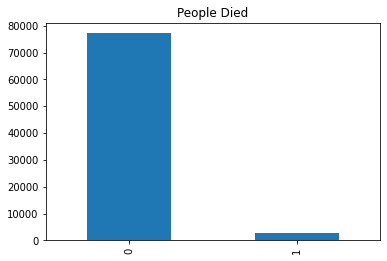

In [36]:
train.Died.value_counts().plot.bar(title = 'People Died')

In [37]:
train.isnull().sum()

SUBJECT_ID     0
HADM_ID        0
ADMITTIME      0
DISCHTIME      0
INSURANCE      0
              ..
Hrtvalvedx     0
Carditis       0
HTN            0
Htncomplicn    9
Died           0
Length: 342, dtype: int64

In [38]:
train = train.dropna()

In [41]:
test.isnull().sum()

SUBJECT_ID     0
HADM_ID        0
ADMITTIME      0
DISCHTIME      0
INSURANCE      0
              ..
Othnervdx      0
Hrtvalvedx     0
Carditis       0
HTN            0
Htncomplicn    3
Length: 341, dtype: int64

In [43]:
test = test.fillna(test['Htncomplicn'].value_counts().index[0])

In [39]:
from collections import Counter
print(Counter(train['Died']))

Counter({0: 77158, 1: 2796})


In [44]:
test['GLUCOSE_MEAN_DAY2'] = pd.to_numeric(test['GLUCOSE_MEAN_DAY2'])

In [47]:
print(test.shape)
print(train.shape)

(20001, 341)
(79954, 342)


In [48]:
train = train.drop(['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME'], axis = 1)
test = test.drop(['SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME'], axis = 1)

In [49]:
# one hot encoding categorical features
categorical_cols = ['INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'GENDER', 'ICU'] 

train = pd.get_dummies(train, columns = categorical_cols)
test = pd.get_dummies(test, columns = categorical_cols)

In [52]:
X = train.copy()
del X['Died']

In [55]:
X1 = train.copy()
del X1['Died']

In [53]:
Y = train['Died']

In [56]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns = X1.columns)

In [57]:
test = scaler.fit_transform(test)
test = pd.DataFrame(test, columns = X1.columns)

In [58]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,random_state=7, shuffle=True, stratify = Y)

In [59]:
!pip install CatBoost

     |████████████████████████████████| 67.3MB 53kB/s 


In [60]:
import random
from catboost import CatBoostClassifier
import pandas as pd
import numpy as np
from numpy import arange
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing

from sklearn.model_selection import StratifiedKFold
n_fold = 4
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

params = {'bagging_temperature': 0.5,
            'depth': 7,
            'iterations': 500,
            'l2_leaf_reg': 25,
            'learning_rate': 0.04,
            'sampling_frequency': 'PerTreeLevel',
            'leaf_estimation_method': 'Gradient',
            'random_strength': 0.8,
            'boosting_type': 'Ordered',
            'feature_border_type': 'MaxLogSum',
            'l2_leaf_reg': 50,
            'max_ctr_complexity': 2,
            'fold_len_multiplier': 2}
model_n = CatBoostClassifier(**params,
                               loss_function='Logloss',
                               eval_metric='AUC',
                               nan_mode='Min',
                               thread_count=8,
                               task_type='CPU',
                               scale_pos_weight = 27,
                               verbose=True
    #iterations=200, 
    #learning_rate=0.1, 
    #loss_function='CrossEntropy'
)
#train model
model_n.fit(x, y, eval_set=(x_test, y_test),
                            
                              verbose_eval=300,
                              early_stopping_rounds=500,
                              use_best_model=True,
                              plot=False)

0:	test: 0.6783413	best: 0.6783413 (0)	total: 897ms	remaining: 7m 27s
300:	test: 0.8047442	best: 0.8047442 (300)	total: 3m 58s	remaining: 2m 37s
499:	test: 0.8014938	best: 0.8048746 (320)	total: 6m 34s	remaining: 0us

bestTest = 0.8048745909
bestIteration = 320

Shrink model to first 321 iterations.


In [61]:
from sklearn.metrics import balanced_accuracy_score
y_cb = model_n.predict(x_test)
balanced_accuracy_score(y_test, y_cb)

0.7254716519631164

In [62]:
A_pred = model_n.predict(test)

In [63]:
from pandas import DataFrame
df_new = DataFrame (A_pred,columns=['Died'])